In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = f_path).get_name()

rc('font', family=font_name)


In [6]:
import pandas as pd
df = pd.read_csv('../data/물동량-체류시간_상관분석.csv')
df

,년도,월,컨테이너,체류시간_totalTime(시간)
0,2013,1,23818165,1088
1,2013,2,21777930,1052
2,2013,3,26068371,1175
3,2013,4,25903253,1203
4,2013,5,25397562,1180
...,...,...,...,...
127,2023,8,34292855,17367
128,2023,9,35206478,17003
129,2023,10,33865762,18293
130,2023,11,35283219,16577


In [19]:
df['컨테이너'].max()

42688022

In [7]:
import numpy as np
np.corrcoef(df['컨테이너'], df['체류시간_totalTime(시간)'])

array([[1.        , 0.49331405],
       [0.49331405, 1.        ]])

## 0.5 정도 되므로 상관관계가 보통정도 된다고 볼 수 있다.

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df1 = pd.DataFrame({'물동량' : df['컨테이너'], '체류시간' : df['체류시간_totalTime(시간)']})
colnames = df1.columns

scaler = StandardScaler()
scaler.fit(df1)
# z-score scaling 수행 결과
print(scaler.transform(df1))


[[-1.72292129 -0.84764111]
 [-2.17169745 -0.85382253]
 [-1.22795929 -0.83270266]
 [-1.26427914 -0.82789488]
 [-1.37551243 -0.83184413]
 [-1.33515693 -0.82909683]
 [-1.29328368 -0.82480417]
 [-1.55707537 -0.86893269]
 [-1.62792061 -0.85622642]
 [-1.41417797 -0.87580094]
 [-1.43691136 -0.84420698]
 [-1.20347169 -0.8282383 ]
 [-1.12968885 -0.83854067]
 [-2.05038743 -0.86017567]
 [-0.78099783 -0.83579337]
 [-0.83694299 -0.8337329 ]
 [-1.09668341 -0.83905579]
 [-0.9251763  -0.82703635]
 [-0.93087598 -0.8472977 ]
 [-1.03244938 -0.83854067]
 [-1.18559222 -0.88078042]
 [-0.64671923 -0.85124694]
 [-1.17472715 -0.84128798]
 [-1.03703671 -0.84764111]
 [-0.72368274 -0.84352016]
 [-1.01156588 -0.78943268]
 [-0.72087117 -0.76693915]
 [-0.76669672 -0.76779768]
 [-0.82388863 -0.75886896]
 [-0.84673552 -0.77226205]
 [-0.77250198 -0.76402014]
 [-0.84966411 -0.77844347]
 [-0.84917645 -0.77466593]
 [-0.90392568 -0.77312058]
 [-1.15093794 -0.79956335]
 [-0.86577046 -0.78239272]
 [-1.10545751 -0.79698775]
 

In [12]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

# 표준화된 데이터 출력
print("표준화된 데이터:")
print(scaled_df)

# 상관계수 계산
correlation_coef = scaled_df['체류시간'].corr(scaled_df['물동량'])
correlation_coef

표준화된 데이터:
          물동량      체류시간
0   -1.722921 -0.847641
1   -2.171697 -0.853823
2   -1.227959 -0.832703
3   -1.264279 -0.827895
4   -1.375512 -0.831844
..        ...       ...
127  0.581123  1.947566
128  0.782086  1.885064
129  0.487178  2.106566
130  0.798966  1.811918
131  0.537892  1.141233

[132 rows x 2 columns]


0.4933140536209879

In [13]:
import numpy as np
np.corrcoef(df1['물동량'], df1['체류시간'])

array([[1.        , 0.49331405],
       [0.49331405, 1.        ]])

In [15]:
# 기울기, 절편, 1차원
# y = ax + b
fp1 = np.polyfit(df['컨테이너'], df['체류시간_totalTime(시간)'], 1) # 1차원으로 그려라
fp1

array([ 6.31956034e-04, -1.39774291e+04])

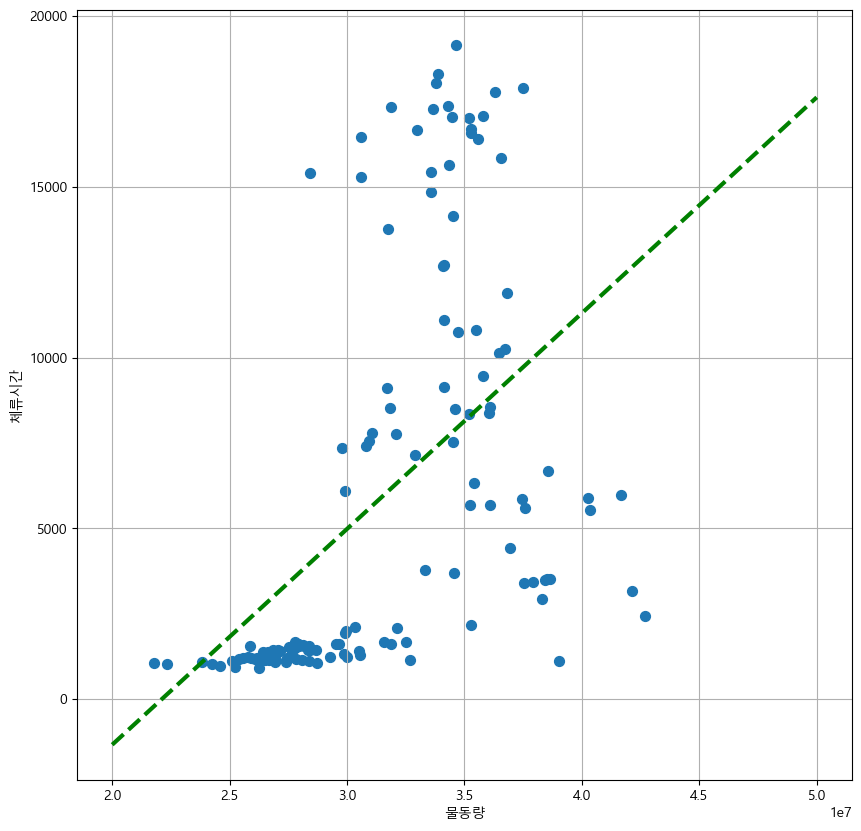

In [21]:
f1 = np.poly1d(fp1) # 매개변수로부터 모델 생성
fx = np.linspace(20000000, 50000000, 100) # 시작, 끝(포함), 갯수
plt.figure(figsize=(10,10))
plt.scatter(df['컨테이너'], df['체류시간_totalTime(시간)'], s = 50)
plt.plot(fx, f1(fx), ls= 'dashed', lw=3, color = 'g')
plt.xlabel('물동량')
plt.ylabel('체류시간')
plt.grid()
plt.show()